In [1]:
import time
from copy import deepcopy
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from dhg import Hypergraph
from dhg.data import *
from dhg.models import HGNN
from dhg.random import set_seed
from sklearn.model_selection import train_test_split
from dhg.metrics import HypergraphVertexClassificationEvaluator as Evaluator

/users/Min/miniconda/envs/hyper/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### HGNN for HouseCommittees

In [3]:
house_data = HouseCommittees()
G = Hypergraph(house_data["num_vertices"], house_data["edge_list"])
print(G)

# # 设置随机种子，以确保结果可复现
random_seed = 42

node_idx = [i for i in range(house_data['num_vertices'])]
# 将idx_test划分为训练（50%）、验证（25%）和测试（25%）集
idx_train, idx_temp = train_test_split(node_idx, test_size=0.5, random_state=random_seed)
idx_val, idx_test = train_test_split(idx_temp, test_size=0.5, random_state=random_seed)

# 确保划分后的集合没有重叠
assert len(set(idx_train) & set(idx_val)) == 0
assert len(set(idx_train) & set(idx_test)) == 0
assert len(set(idx_val) & set(idx_test)) == 0

train_mask = torch.zeros(house_data['num_vertices'], dtype=torch.bool)
val_mask = torch.zeros(house_data['num_vertices'], dtype=torch.bool)
test_mask = torch.zeros(house_data['num_vertices'], dtype=torch.bool)
train_mask[idx_train] = True
val_mask[idx_val] = True
test_mask[idx_test] = True

v_deg= G.D_v
X = v_deg.to_dense()/torch.max(v_deg.to_dense())

lbls = house_data["labels"]
print('X dim:', X.shape)
print('labels:', len(torch.unique(lbls)))


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Hypergraph(num_v=1290, num_e=336)
X dim: torch.Size([1290, 1290])
labels: 2


In [4]:
print('train:val:test',len(idx_train),len(idx_val),len(idx_test))

train:val:test 645 322 323


HGNN(
  (layers): ModuleList(
    (0): HGNNConv(
      (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
      (drop): Dropout(p=0.5, inplace=False)
      (theta): Linear(in_features=1290, out_features=256, bias=True)
    )
    (1): HGNNConv(
      (bn): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
      (drop): Dropout(p=0.5, inplace=False)
      (theta): Linear(in_features=256, out_features=3, bias=True)
    )
  )
)
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 1.12570, Val Loss: 1.12570, Validation Accuracy: 0.4782608695652174
update best: 0.47826
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
   

Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.96836, Val Loss: 0.96836, Validation Accuracy: 0.4782608695652174
Epoch: 3, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.95160, Val Loss: 0.95160, Validation Accuracy: 0.4782608695652174
Epoch: 4, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.92446, Val Loss: 0.92446, Validation Accuracy: 0.4782608695652174
Epoch: 5, LR: Adam (
Parameter Group 0
    amsgrad: Fal

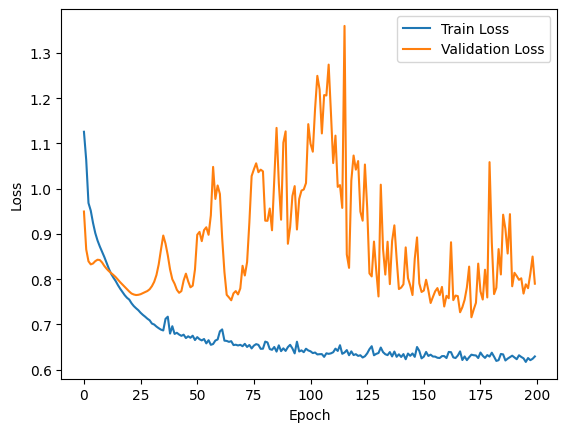

test...
Test Accuracy: 0.5201238390092879
Micro F1: 0.5201238390092879
Macro F1: 0.5159481383364434
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.63009, Val Loss: 0.63009, Validation Accuracy: 0.5807453416149069
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.62315, Val Loss: 0.62315, Validation Accuracy: 0.5590062111801242
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.64660, Val Loss: 0.64

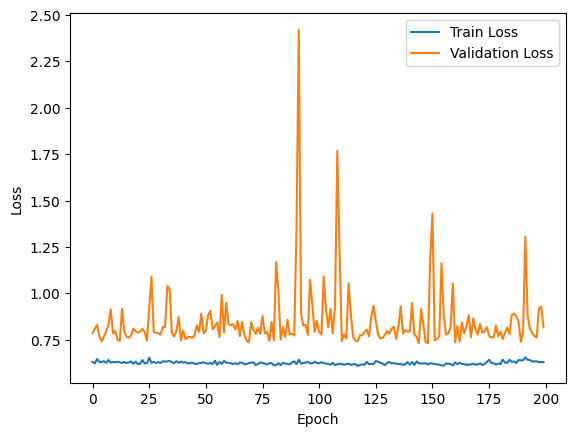

test...
Test Accuracy: 0.5386996904024768
Micro F1: 0.5386996904024768
Macro F1: 0.5210528934666866
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.63458, Val Loss: 0.63458, Validation Accuracy: 0.5031055900621118
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.62885, Val Loss: 0.62885, Validation Accuracy: 0.5093167701863354
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.62013, Val Loss: 0.62

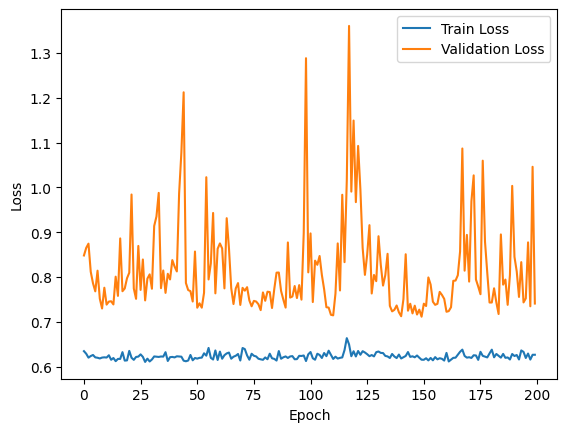

test...
Test Accuracy: 0.5015479876160991
Micro F1: 0.5015479876160991
Macro F1: 0.49829720316826337
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.63017, Val Loss: 0.63017, Validation Accuracy: 0.515527950310559
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.63160, Val Loss: 0.63160, Validation Accuracy: 0.5186335403726708
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.61998, Val Loss: 0.61

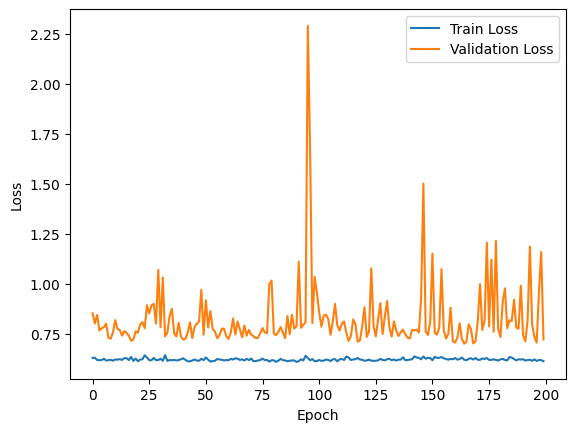

test...
Test Accuracy: 0.5015479876160991
Micro F1: 0.5015479876160991
Macro F1: 0.49829720316826337
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.61646, Val Loss: 0.61646, Validation Accuracy: 0.5496894409937888
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.61689, Val Loss: 0.61689, Validation Accuracy: 0.5652173913043478
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0.0005
), Loss: 0.62947, Val Loss: 0.6

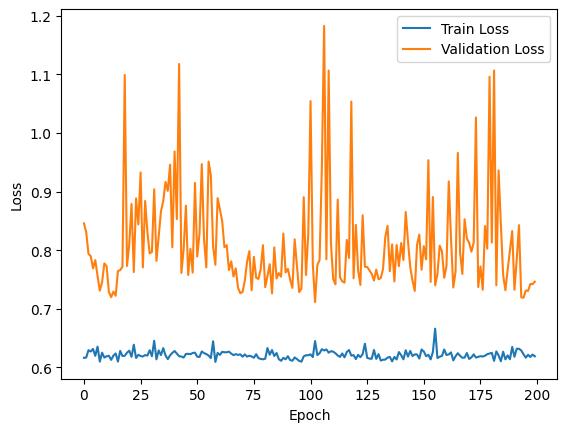

test...
Test Accuracy: 0.5015479876160991
Micro F1: 0.5015479876160991
Macro F1: 0.49829720316826337
test acc: 0.5126934984520124 test acc std: 0.014860681114551078


test microf1: 0.5126934984520124 test macrof1: 0.506378528261584


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

set_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])

net = HGNN(X.shape[1], 256, house_data["num_classes"], use_bn=True)
print(net)
optimizer = optim.Adam(net.parameters(), lr=0.05, weight_decay=5e-4)

X, lbls = X.to(device), lbls.to(device)
G = G.to(device)
net = net.to(device)

best_state = None
best_epoch, best_val = 0, 0
num_epochs = 200
all_acc, all_microf1, all_macrof1 = [],[],[]
for run in range(5):

    train_losses = []  # 新增：用于存储每个epoch的train_loss
    val_losses = []  # 新增：用于存储每个epoch的val_loss
    for epoch in range(num_epochs):
        # train
        net.train()
        optimizer.zero_grad()
        outs = net(X,G)
        outs, lbl = outs[idx_train], lbls[idx_train]
        loss = F.cross_entropy(outs, lbl)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # validation
        net.eval()
        with torch.no_grad():
            outs = net(X,G)
            outs, lbl = outs[idx_val], lbls[idx_val]
            val_loss = F.cross_entropy(outs, lbl)
            val_losses.append(val_loss)  # 新增：记录val_loss

            _, predicted = torch.max(outs, 1)
            correct = (predicted == lbl).sum().item()
            total = lbl.size(0)
            val_acc = correct / total
            print(f"Epoch: {epoch}, LR: {optimizer}, Loss: {loss.item():.5f}, Val Loss: {loss.item():.5f}, Validation Accuracy: {val_acc}")
            

            # Save the model if it has the best validation accuracy
            if val_acc > best_val:
                print(f"update best: {val_acc:.5f}")
                best_val = val_acc
                best_state = deepcopy(net.state_dict())
                torch.save(net.state_dict(), 'hgnn_house_best_model.pth')

    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")

    # 绘制曲线图
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # test
    print("test...")
    net.load_state_dict(best_state)

    net.eval()
    with torch.no_grad():
        outs = net(X, G)
        outs, lbl = outs[idx_test], lbls[idx_test]

        # Calculate accuracy
        _, predicted = torch.max(outs, 1)
        correct = (predicted == lbl).sum().item()
        total = lbl.size(0)
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc}')

        # Calculate micro F1
        micro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='micro')
        print(f'Micro F1: {micro_f1}')

        # Calculate macro F1
        macro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='macro')
        print(f'Macro F1: {macro_f1}')

    all_acc.append(test_acc)
    all_microf1.append(micro_f1)
    all_macrof1.append(macro_f1)

# avg of 5 times
print('test acc:', np.mean(all_acc), 'test acc std:', np.std(all_acc))
print('\n')
print('test microf1:', np.mean(all_microf1), 'test macrof1:', np.mean(all_macrof1))

#### HyperGCN on HouseCommittees

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn.conv import MessagePassing, GCNConv, GATConv
import math 
from torch_scatter import scatter
from torch_geometric.utils import softmax
import allset_utils,allset_layers

/users/Min/HyperGCL/src/allset_layers.py:568: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not (normalization.__class__.__name__ is 'Identity'):
/users/Min/HyperGCL/src/allset_layers.py:617: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not (self.f_enc.__class__.__name__ is 'Identity'):
/users/Min/HyperGCL/src/allset_layers.py:619: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not (self.f_dec.__class__.__name__ is 'Identity'):


In [11]:
len(house_data['edge_list'][0])

53

In [12]:
num_hes = len(house_data['edge_list'])
he_idx = [i for i in range(num_hes)]
He_dict = dict(zip(he_idx, list(house_data['edge_list'][i] for i in range(num_hes))))
He_dict

{0: (0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52),
 1: (53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112),
 2: (22,
  46,
  52,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  1

In [22]:
V = X.shape[0]
num_features = X.shape[1]
num_layers = 2
num_classes = len(torch.unique(lbls))
lbls = lbls - torch.min(lbls)
print('V:', V)
print('num_feats:', num_features, 'num_layers:', num_layers, 'num_classes:', num_classes)

V: 1290
num_feats: 1290 num_layers: 2 num_classes: 2


In [14]:
HyperGCN_fast = False
HyperGCN_mediators = False
dname = 'house'
dropout = 0.5
lbls = house_data["labels"]
device

device(type='cpu')

In [17]:
class HyperGCN(nn.Module):
    def __init__(self, V, E, X, num_features, num_layers, num_classses):
        """
        d: initial node-feature dimension
        h: number of hidden units
        c: number of classes
        """
        super(HyperGCN, self).__init__()
        d, l, c = num_features, num_layers, num_classses
        # cuda = args.cuda  # and torch.cuda.is_available()

        h = [d]
        for i in range(l-1):
            power = l - i + 2
            if dname == 'citeseer':
                power = l - i + 4
            h.append(2**power)
        h.append(c)

        if HyperGCN_fast:
            reapproximate = False
            structure = allset_utils.Laplacian(V, E, X, HyperGCN_mediators)
        else:
            reapproximate = True
            structure = E

        self.layers = nn.ModuleList([allset_utils.HyperGraphConvolution(
            h[i], h[i+1], reapproximate) for i in range(l)])
        self.do, self.l = dropout, num_layers
        self.structure, self.m = structure, HyperGCN_mediators

    def reset_parameters(self):
        for layer in self.layers:
            layer.reset_parameters()

    def forward(self, X):
        """
        an l-layer GCN
        """
        do, l, m = self.do, self.l, self.m
        H = X

        for i, hidden in enumerate(self.layers):
            H = F.relu(hidden(self.structure, H, m))
            if i < l - 1:
                V = H
                H = F.dropout(H, do, training=self.training)

        return H

model_hypergcn: HyperGCN(
  (layers): ModuleList(
    (0): HyperGraphConvolution (1290 -> 16)
    (1): HyperGraphConvolution (16 -> 2)
  )
)
Epoch: 0, Time: 0.02252s, Loss: 0.69489
Epoch: 0, Loss: 0.69489, Val Loss: 0.69489, Validation Accuracy: 0.5217391304347826
update best: 0.52174
Epoch: 1, Time: 0.01998s, Loss: 0.69627
Epoch: 1, Loss: 0.69627, Val Loss: 0.69627, Validation Accuracy: 0.5217391304347826
Epoch: 2, Time: 0.01986s, Loss: 0.69566
Epoch: 2, Loss: 0.69566, Val Loss: 0.69566, Validation Accuracy: 0.5217391304347826
Epoch: 3, Time: 0.01984s, Loss: 0.69352
Epoch: 3, Loss: 0.69352, Val Loss: 0.69352, Validation Accuracy: 0.5217391304347826
Epoch: 4, Time: 0.01989s, Loss: 0.69573
Epoch: 4, Loss: 0.69573, Val Loss: 0.69573, Validation Accuracy: 0.5217391304347826


Epoch: 5, Time: 0.02052s, Loss: 0.69753
Epoch: 5, Loss: 0.69753, Val Loss: 0.69753, Validation Accuracy: 0.5217391304347826
Epoch: 6, Time: 0.01990s, Loss: 0.69301
Epoch: 6, Loss: 0.69301, Val Loss: 0.69301, Validation Accuracy: 0.5217391304347826
Epoch: 7, Time: 0.01999s, Loss: 0.69496
Epoch: 7, Loss: 0.69496, Val Loss: 0.69496, Validation Accuracy: 0.5217391304347826
Epoch: 8, Time: 0.01984s, Loss: 0.69539
Epoch: 8, Loss: 0.69539, Val Loss: 0.69539, Validation Accuracy: 0.5217391304347826
Epoch: 9, Time: 0.01532s, Loss: 0.69498
Epoch: 9, Loss: 0.69498, Val Loss: 0.69498, Validation Accuracy: 0.5217391304347826
Epoch: 10, Time: 0.01531s, Loss: 0.69507
Epoch: 10, Loss: 0.69507, Val Loss: 0.69507, Validation Accuracy: 0.5217391304347826
Epoch: 11, Time: 0.01639s, Loss: 0.69536
Epoch: 11, Loss: 0.69536, Val Loss: 0.69536, Validation Accuracy: 0.5217391304347826
Epoch: 12, Time: 0.01532s, Loss: 0.69631
Epoch: 12, Loss: 0.69631, Val Loss: 0.69631, Validation Accuracy: 0.5217391304347826
Ep

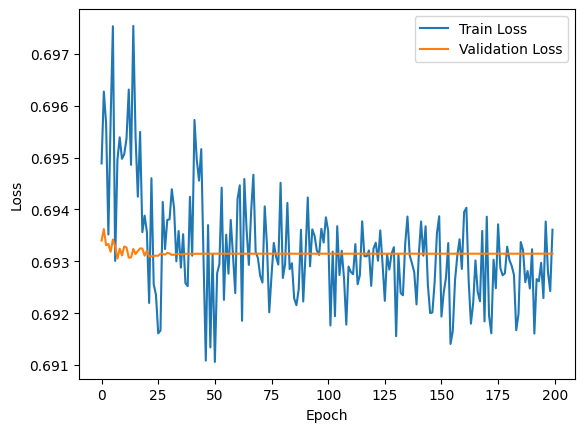

test...
Test Accuracy: 0.4613003095975232
Micro F1: 0.4613003095975232
Macro F1: 0.3156779661016949
Epoch: 0, Time: 0.01332s, Loss: 0.69481
Epoch: 0, Loss: 0.69481, Val Loss: 0.69481, Validation Accuracy: 0.5217391304347826
Epoch: 1, Time: 0.01203s, Loss: 0.69647
Epoch: 1, Loss: 0.69647, Val Loss: 0.69647, Validation Accuracy: 0.5217391304347826
Epoch: 2, Time: 0.01193s, Loss: 0.69323
Epoch: 2, Loss: 0.69323, Val Loss: 0.69323, Validation Accuracy: 0.5217391304347826
Epoch: 3, Time: 0.01207s, Loss: 0.69282
Epoch: 3, Loss: 0.69282, Val Loss: 0.69282, Validation Accuracy: 0.5217391304347826
Epoch: 4, Time: 0.01195s, Loss: 0.69381
Epoch: 4, Loss: 0.69381, Val Loss: 0.69381, Validation Accuracy: 0.5217391304347826
Epoch: 5, Time: 0.01196s, Loss: 0.69364
Epoch: 5, Loss: 0.69364, Val Loss: 0.69364, Validation Accuracy: 0.5217391304347826
Epoch: 6, Time: 0.01180s, Loss: 0.69169
Epoch: 6, Loss: 0.69169, Val Loss: 0.69169, Validation Accuracy: 0.5217391304347826
Epoch: 7, Time: 0.01187s, Loss: 

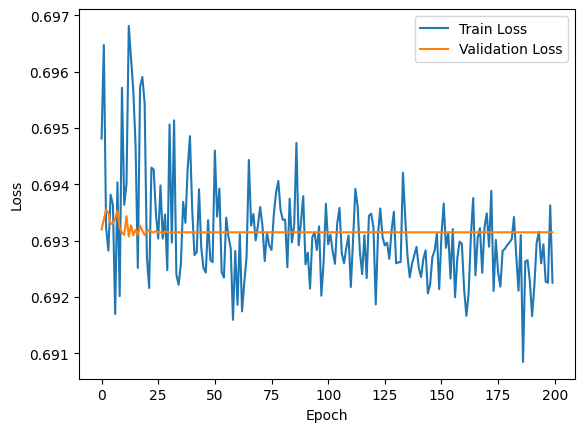

test...
Test Accuracy: 0.4613003095975232
Micro F1: 0.4613003095975232
Macro F1: 0.3156779661016949
Epoch: 0, Time: 0.01243s, Loss: 0.69533
Epoch: 0, Loss: 0.69533, Val Loss: 0.69533, Validation Accuracy: 0.5217391304347826
Epoch: 1, Time: 0.01213s, Loss: 0.69549
Epoch: 1, Loss: 0.69549, Val Loss: 0.69549, Validation Accuracy: 0.5217391304347826
Epoch: 2, Time: 0.01208s, Loss: 0.69606
Epoch: 2, Loss: 0.69606, Val Loss: 0.69606, Validation Accuracy: 0.5217391304347826
Epoch: 3, Time: 0.01213s, Loss: 0.69527
Epoch: 3, Loss: 0.69527, Val Loss: 0.69527, Validation Accuracy: 0.5217391304347826
Epoch: 4, Time: 0.01211s, Loss: 0.69571
Epoch: 4, Loss: 0.69571, Val Loss: 0.69571, Validation Accuracy: 0.5217391304347826
Epoch: 5, Time: 0.01201s, Loss: 0.69394
Epoch: 5, Loss: 0.69394, Val Loss: 0.69394, Validation Accuracy: 0.5217391304347826
Epoch: 6, Time: 0.01212s, Loss: 0.69547
Epoch: 6, Loss: 0.69547, Val Loss: 0.69547, Validation Accuracy: 0.5217391304347826
Epoch: 7, Time: 0.01213s, Loss: 

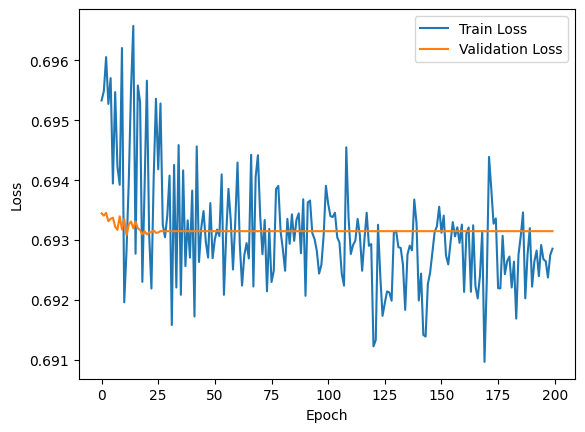

test...
Test Accuracy: 0.4613003095975232
Micro F1: 0.4613003095975232
Macro F1: 0.3156779661016949
Epoch: 0, Time: 0.01246s, Loss: 0.69637
Epoch: 0, Loss: 0.69637, Val Loss: 0.69637, Validation Accuracy: 0.5217391304347826
Epoch: 1, Time: 0.01210s, Loss: 0.69501
Epoch: 1, Loss: 0.69501, Val Loss: 0.69501, Validation Accuracy: 0.5217391304347826
Epoch: 2, Time: 0.01203s, Loss: 0.69655
Epoch: 2, Loss: 0.69655, Val Loss: 0.69655, Validation Accuracy: 0.5217391304347826
Epoch: 3, Time: 0.01191s, Loss: 0.69594
Epoch: 3, Loss: 0.69594, Val Loss: 0.69594, Validation Accuracy: 0.5217391304347826
Epoch: 4, Time: 0.01184s, Loss: 0.69362
Epoch: 4, Loss: 0.69362, Val Loss: 0.69362, Validation Accuracy: 0.5217391304347826
Epoch: 5, Time: 0.01193s, Loss: 0.69058
Epoch: 5, Loss: 0.69058, Val Loss: 0.69058, Validation Accuracy: 0.5217391304347826
Epoch: 6, Time: 0.01188s, Loss: 0.69536
Epoch: 6, Loss: 0.69536, Val Loss: 0.69536, Validation Accuracy: 0.5217391304347826
Epoch: 7, Time: 0.01183s, Loss: 

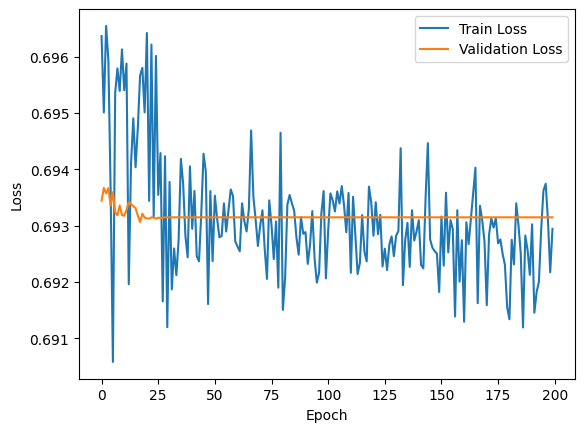

test...
Test Accuracy: 0.4613003095975232
Micro F1: 0.4613003095975232
Macro F1: 0.3156779661016949
Epoch: 0, Time: 0.01246s, Loss: 0.69494
Epoch: 0, Loss: 0.69494, Val Loss: 0.69494, Validation Accuracy: 0.5217391304347826
Epoch: 1, Time: 0.01208s, Loss: 0.69788
Epoch: 1, Loss: 0.69788, Val Loss: 0.69788, Validation Accuracy: 0.5217391304347826
Epoch: 2, Time: 0.01225s, Loss: 0.69238
Epoch: 2, Loss: 0.69238, Val Loss: 0.69238, Validation Accuracy: 0.5217391304347826
Epoch: 3, Time: 0.01204s, Loss: 0.69511
Epoch: 3, Loss: 0.69511, Val Loss: 0.69511, Validation Accuracy: 0.5217391304347826
Epoch: 4, Time: 0.01217s, Loss: 0.69687
Epoch: 4, Loss: 0.69687, Val Loss: 0.69687, Validation Accuracy: 0.5217391304347826
Epoch: 5, Time: 0.01195s, Loss: 0.69532
Epoch: 5, Loss: 0.69532, Val Loss: 0.69532, Validation Accuracy: 0.5217391304347826
Epoch: 6, Time: 0.01198s, Loss: 0.69608
Epoch: 6, Loss: 0.69608, Val Loss: 0.69608, Validation Accuracy: 0.5217391304347826
Epoch: 7, Time: 0.01185s, Loss: 

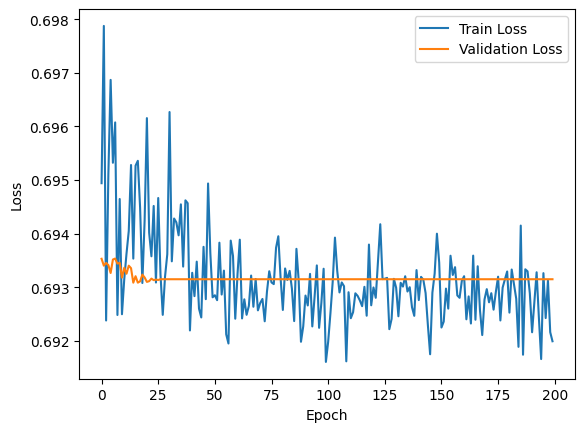

test...
Test Accuracy: 0.4613003095975232
Micro F1: 0.4613003095975232
Macro F1: 0.3156779661016949
test acc: 0.4613003095975232 test acc std: 0.0


test microf1: 0.4613003095975232 test macrof1: 0.3156779661016949


In [31]:
model_hypergcn = HyperGCN(V, He_dict, X, num_features, num_layers, num_classes)
optimizer = optim.Adam(model_hypergcn.parameters(),lr=0.0005,weight_decay=5e-4)
model_hypergcn = model_hypergcn.to(device)
print(f'model_hypergcn:', model_hypergcn)

best_state = None
best_epoch, best_val = 0, 0
evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])

all_acc, all_microf1, all_macrof1 = [],[],[]
for run in range(5):
    train_losses = []  # 新增：用于存储每个epoch的train_loss
    val_losses = []  # 新增：用于存储每个epoch的val_loss
    for epoch in range(num_epochs):
        model_hypergcn.train()
        st = time.time()
        optimizer.zero_grad()
        outs = model_hypergcn(X)
        outs, lbl = outs[idx_train], lbls[idx_train]
        loss = F.cross_entropy(outs, lbl)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        print(f"Epoch: {epoch}, Time: {time.time()-st:.5f}s, Loss: {loss.item():.5f}")

        # validation

        model_hypergcn.eval()
        with torch.no_grad():
            outs = model_hypergcn(X)
            outs, lbl = outs[idx_val], lbls[idx_val]
            val_loss = F.cross_entropy(outs, lbl)
            val_losses.append(val_loss.item())

            _, predicted = torch.max(outs, 1)
            correct = (predicted == lbl).sum().item()
            total = lbl.size(0)
            val_acc = correct / total
            print(f"Epoch: {epoch}, Loss: {loss.item():.5f}, Val Loss: {loss.item():.5f}, Validation Accuracy: {val_acc}")
            
            # Save the model if it has the best validation accuracy
            if val_acc > best_val:
                print(f"update best: {val_acc:.5f}")
                best_val = val_acc
                best_state = deepcopy(model_hypergcn.state_dict())
                torch.save(net.state_dict(), 'hypergcn_house_best_model.pth')

    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")

    # 绘制曲线图
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # test
    print("test...")
    model_hypergcn.load_state_dict(best_state)

    model_hypergcn.eval()
    with torch.no_grad():
        outs = model_hypergcn(X)
        outs, lbl = outs[idx_test], lbls[idx_test]

        # Calculate accuracy
        _, predicted = torch.max(outs, 1)
        correct = (predicted == lbl).sum().item()
        total = lbl.size(0)
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc}')

        # Calculate micro F1
        micro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='micro')
        print(f'Micro F1: {micro_f1}')

        # Calculate macro F1
        macro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='macro')
        print(f'Macro F1: {macro_f1}')

    all_acc.append(test_acc)
    all_microf1.append(micro_f1)
    all_macrof1.append(macro_f1)


# avg of 3 times
print('test acc:', np.mean(all_acc), 'test acc std:', np.std(all_acc))
print('\n')
print('test microf1:', np.mean(all_microf1), 'test macrof1:', np.mean(all_macrof1))


#### HCHA on HouseCommittees

In [32]:
HCHA_symdegnorm=False
MLP_hidden=64

In [33]:
class HCHA(nn.Module):
    """
    This model is proposed by "Hypergraph Convolution and Hypergraph Attention" (in short HCHA) and its convolutional layer 
    is implemented in pyg.
    """

    def __init__(self, num_features, num_layers, num_classes, MLP_hidden, dropout, HCHA_symdegnorm):
        super(HCHA, self).__init__()

        self.num_layers = num_layers
        self.dropout = dropout  # Note that default is 0.6
        self.symdegnorm = HCHA_symdegnorm

#         Note that add dropout to attention is default in the original paper
        self.convs = nn.ModuleList()
        self.convs.append(HypergraphConv(num_features,
                                         MLP_hidden, self.symdegnorm))
        for _ in range(self.num_layers-2):
            self.convs.append(HypergraphConv(
                MLP_hidden, MLP_hidden, self.symdegnorm))
        # Output heads is set to 1 as default
        self.convs.append(HypergraphConv(
            MLP_hidden, num_classes, self.symdegnorm))

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()

    def forward(self, x, edge_index):

        # x = data.x
        # edge_index = data.edge_index

        for i, conv in enumerate(self.convs[:-1]):
            x = F.elu(conv(x, edge_index))
            x = F.dropout(x, p=self.dropout, training=self.training)

#         x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)

        return x

In [34]:
def from_hypergraph_clique(
    hypergraph: "Hypergraph", weighted: bool = False, miu: float = 1.0, device: torch.device = torch.device("cpu"),
) -> "Graph":
    r"""Construct a graph from a hypergraph with clique expansion refering to `Higher Order Learning with Graphs <https://homes.cs.washington.edu/~sagarwal/holg.pdf>`_ paper.

    Args:
        ``hypergraph`` (``Hypergraph``): The source hypergraph.
        ``weighted`` (``bool``, optional): Whether to construct a weighted graph. Defaults to ``False``.
        ``miu`` (``float``, optional): The parameter of clique expansion. Defaults to ``1.0``.
        ``device`` (``torch.device``): The device to store the graph. Defaults to ``torch.device("cpu")``.
    """
    num_v = hypergraph.num_v
    miu = 1.0
    adj = miu * hypergraph.H.mm(hypergraph.H_T).coalesce().cpu().clone()
    src_idx, dst_idx = adj._indices()
    edge_mask = src_idx < dst_idx
    edge_list = torch.stack([src_idx[edge_mask], dst_idx[edge_mask]]).t().cpu().numpy().tolist()
    # if weighted:
    #     e_weight = adj._values()[edge_mask].numpy().tolist()
    #     _g = Graph(num_v, edge_list, e_weight, merge_op="sum", device=device)
    # else:
    #     _g = Graph(num_v, edge_list, merge_op="mean", device=device)
    return num_v, edge_list

In [35]:
G.num_v,G.e[0][:5]

(1290,
 [(0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52),
  (53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112),
  (22,
   46,
   52,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,


In [36]:
import numpy as np

# 将超边列表转换为边索引的两个维度
node_list = []
he_list = []
he_id = 0
for hyperedge in G.e[0]:
    node_list += list(hyperedge)
    he_list += [he_id] * len(hyperedge)
    he_id += 1

# 计算偏移量，将节点索引从最小值开始重新映射为从0开始的连续整数
node_idx_min = np.min(node_list)
node_list = [x - node_idx_min for x in node_list]

# 构造边索引数组
edge_index = np.array([node_list, he_list])

In [37]:
edge_index.shape, X.shape, len(node_list)

((2, 11831), torch.Size([1290, 1290]), 11831)

In [38]:
edge_index = torch.LongTensor(edge_index) # 节点index-超边index
edge_index[1] -= edge_index[1].min()
edge_index, torch.max(edge_index), edge_index.shape

(tensor([[   0,    1,    2,  ..., 1190, 1191, 1230],
         [   0,    0,    0,  ...,  335,  335,  335]]),
 tensor(1289),
 torch.Size([2, 11831]))

In [39]:
X.shape, len(he_list), max(he_list)

(torch.Size([1290, 1290]), 11831, 335)

In [40]:
import numpy as np
import torch
from scipy import sparse
from torch_geometric.data import Data
from torch_sparse import coalesce

def create_pyg_data(X, H):
    # X: Node features, H: Hypergraph adjacency matrix

    # Convert X to a dense tensor
    x = torch.FloatTensor(X.to_dense())

    # Convert H to a dense tensor and then to a coo_matrix
    H_dense = H.to_dense()
    coo_H = sparse.coo_matrix(H_dense.numpy())

    # Build edge_index from COO format
    edge_index = torch.LongTensor(np.vstack((coo_H.col, coo_H.row)))

    # Create a Data object
    data = Data(x=x, edge_index=edge_index)

    # Coalesce edge_index to remove duplicates
    total_num_nodes = X.shape[0]  # get the total number of nodes
    data.edge_index, _ = coalesce(data.edge_index, None, total_num_nodes, total_num_nodes)

    return data

# Example usage:
# Assuming X is your node features and H is your hypergraph adjacency matrix
data = create_pyg_data(X, G.H)

# data = Data(x=X, edge_index=edge_index)
data

Data(x=[1290, 1290], edge_index=[2, 11811])

model_hcha:
 HCHA(
  (convs): ModuleList(
    (0): HypergraphConv(1290, 64)
    (1): HypergraphConv(64, 2)
  )
)
Epoch: 0, Time: 0.02482s, Loss: 0.69321
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.69321, Val Loss: 0.69321, Validation Accuracy: 0.5838509316770186
update best: 0.58385
Epoch: 1, Time: 0.01546s, Loss: 0.69079
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.69079, Val Loss: 0.69079, Validation Accuracy: 0.5838509316770186
Epoch: 2, Time: 0.01217s, Loss: 0.68855
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differ

Epoch: 108, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.67454, Val Loss: 0.67454, Validation Accuracy: 0.5838509316770186
Epoch: 109, Time: 0.00984s, Loss: 0.67463
Epoch: 109, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.67463, Val Loss: 0.67463, Validation Accuracy: 0.5838509316770186
Epoch: 110, Time: 0.00998s, Loss: 0.67473
Epoch: 110, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.67473, Val Loss: 0.67473, Va

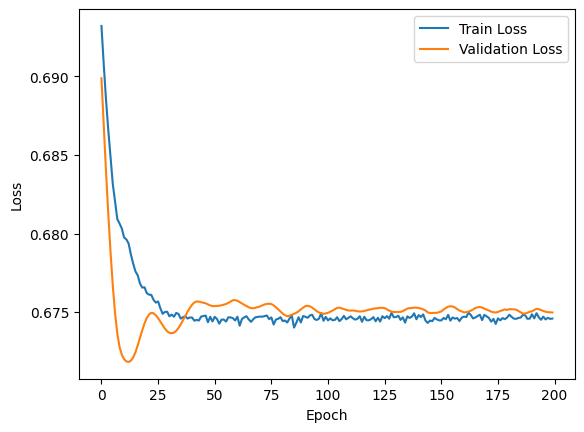

test...
Test Accuracy: 0.5727554179566563
Micro F1: 0.5727554179566563
Macro F1: 0.5304045512010114
Epoch: 0, Time: 0.00913s, Loss: 0.69074
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.69074, Val Loss: 0.69074, Validation Accuracy: 0.5838509316770186
Epoch: 1, Time: 0.00922s, Loss: 0.68963
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.68963, Val Loss: 0.68963, Validation Accuracy: 0.5838509316770186
Epoch: 2, Time: 0.00877s, Loss: 0.68787
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
   

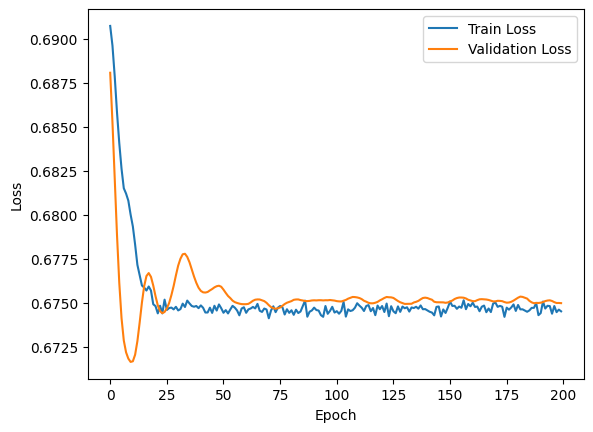

test...
Test Accuracy: 0.5727554179566563
Micro F1: 0.5727554179566563
Macro F1: 0.5304045512010114
Epoch: 0, Time: 0.00897s, Loss: 0.69073
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.69073, Val Loss: 0.69073, Validation Accuracy: 0.5838509316770186
Epoch: 1, Time: 0.00888s, Loss: 0.68949
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.68949, Val Loss: 0.68949, Validation Accuracy: 0.5838509316770186
Epoch: 2, Time: 0.00910s, Loss: 0.68764
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
   

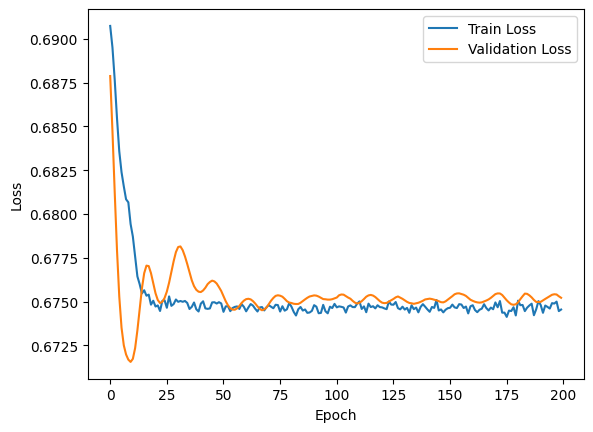

test...
Test Accuracy: 0.5727554179566563
Micro F1: 0.5727554179566563
Macro F1: 0.5304045512010114
Epoch: 0, Time: 0.00897s, Loss: 0.69076
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.69076, Val Loss: 0.69076, Validation Accuracy: 0.5838509316770186
Epoch: 1, Time: 0.00894s, Loss: 0.68951
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.68951, Val Loss: 0.68951, Validation Accuracy: 0.5838509316770186
Epoch: 2, Time: 0.00893s, Loss: 0.68738
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
   

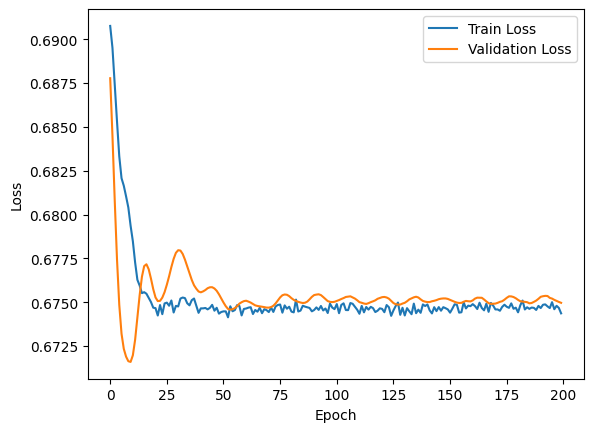

test...
Test Accuracy: 0.5727554179566563
Micro F1: 0.5727554179566563
Macro F1: 0.5304045512010114
Epoch: 0, Time: 0.00910s, Loss: 0.69076
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.69076, Val Loss: 0.69076, Validation Accuracy: 0.5838509316770186
Epoch: 1, Time: 0.00880s, Loss: 0.68936
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.005
    maximize: False
    weight_decay: 0.0005
), Loss: 0.68936, Val Loss: 0.68936, Validation Accuracy: 0.5838509316770186
Epoch: 2, Time: 0.00891s, Loss: 0.68733
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
   

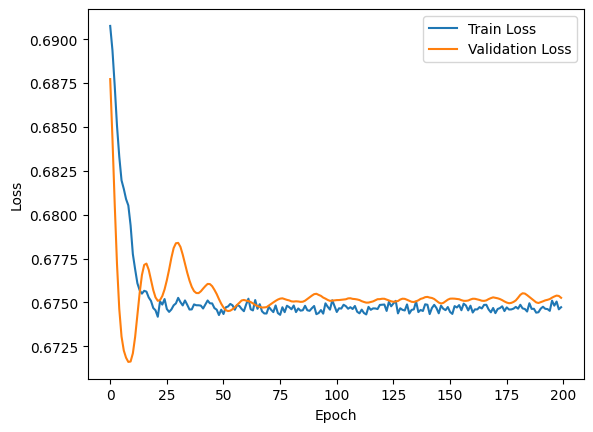

test...
Test Accuracy: 0.5727554179566563
Micro F1: 0.5727554179566563
Macro F1: 0.5304045512010114
test acc: 0.5727554179566563 test acc std: 0.0


test microf1: 0.5727554179566563 test macrof1: 0.5304045512010114


In [45]:
model_hcha = HCHA(num_features, num_layers, num_classes, MLP_hidden, dropout, HCHA_symdegnorm)
optimizer = optim.Adam(model_hcha.parameters(),lr=0.005,weight_decay=5e-4)
model_hcha = model_hcha.to(device)
print(f'model_hcha:\n',model_hcha)

best_state = None
best_epoch, best_val = 0, 0
evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])

all_acc, all_microf1, all_macrof1 = [],[],[]
for run in range(5):
    train_losses = []  # 新增：用于存储每个epoch的train_loss
    val_losses = []  # 新增：用于存储每个epoch的val_loss
    for epoch in range(num_epochs):
        model_hcha.train()
        st = time.time()
        optimizer.zero_grad()
        outs = model_hcha(data.x, data.edge_index)
        outs, lbl = outs[idx_train], lbls[idx_train]
        
        loss = F.cross_entropy(outs, lbl)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        print(f"Epoch: {epoch}, Time: {time.time()-st:.5f}s, Loss: {loss.item():.5f}")

        # validation

        model_hcha.eval()
        with torch.no_grad():
            outs = model_hcha(data.x, data.edge_index)
            
            outs, lbl = outs[idx_val], lbls[idx_val]
            res = evaluator.test(lbl, outs)
            val_loss = F.cross_entropy(outs, lbl)
            val_losses.append(val_loss.item())

            _, predicted = torch.max(outs, 1)
            correct = (predicted == lbl).sum().item()
            total = lbl.size(0)
            val_acc = correct / total
            print(f"Epoch: {epoch}, LR: {optimizer}, Loss: {loss.item():.5f}, Val Loss: {loss.item():.5f}, Validation Accuracy: {val_acc}")
            

            # Save the model if it has the best validation accuracy
            if val_acc > best_val:
                print(f"update best: {val_acc:.5f}")
                best_val = val_acc
                best_state = deepcopy(model_hcha.state_dict())
                torch.save(model_hcha.state_dict(), 'hcha_house_best_model.pth')
        
    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")

    # 绘制曲线图
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # test
    print("test...")
    model_hcha.load_state_dict(best_state)

    model_hcha.eval()
    with torch.no_grad():
        outs = model_hcha(data.x, data.edge_index)
        outs, lbl = outs[idx_test], lbls[idx_test]

        # Calculate accuracy
        _, predicted = torch.max(outs, 1)
        correct = (predicted == lbl).sum().item()
        total = lbl.size(0)
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc}')

        # Calculate micro F1
        micro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='micro')
        print(f'Micro F1: {micro_f1}')

        # Calculate macro F1
        macro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='macro')
        print(f'Macro F1: {macro_f1}')
    
    all_acc.append(test_acc)
    all_microf1.append(micro_f1)
    all_macrof1.append(macro_f1)

# avg of 5 times
print('test acc:', np.mean(all_acc), 'test acc std:', np.std(all_acc))
print('\n')
print('test microf1:', np.mean(all_microf1), 'test macrof1:', np.mean(all_macrof1))
